<a href="https://colab.research.google.com/github/stawiskm/QSAR_LightGBM/blob/main/CCR5_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACI Project: QSAR Regression models with RF and LightGBM on CCR5 inhibitors**
---


Marc Jermann   \ Patrick Meier


---

While quantitative structure-activity relationship
models are increasingly used nowadays, this study compares
two different machine learning methods in just such QSAR
models. The Light Gradient Boosting Machine method uses the
well established decision tree approach and has been optimized
for larger datasets. To test the applicability of this method, we
compare it with a Random Forest model, the existing state-of-the-
art method for such QSAR models, in three different applications.


---

In this Jupyter notebook, we will be building a real-life **data science project**.

---
C-C chemokine receptor type 5 is a protein on the surface
of white blood cells that is involved in the immune system as
a receptor for chemokines. CCR5 inhibitors are a new class
of antiretroviral drugs used to treat human immunodeficiency
virus (HIV). They are designed to prevent HIV infection of
CD4 T cells by blocking the CCR5 receptor.

## Investigating target protein

In [ ]:
# Install ChEMBL webresource client
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 596 kB 10.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [ ]:
# Import necessary libraries
import pandas as pd 
from chembl_webresource_client.new_client import new_client

In [ ]:
# Load activity data of the 'C-C chemokine receptor type 5' filtered by half maximal inhibitory concentration (IC50) (~8min)
activity = new_client.activity
res = activity.filter(target_chembl_id="CHEMBL274").filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,75508,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,335.0
1,None,75509,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,28.0
2,None,75510,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,10.0
3,None,76739,[],CHEMBL873385,Binding affinity against human CCR5 receptor s...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,35.0
4,None,77749,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,15.0


In [ ]:
# Number of molecules (5067 Entries on April 25th 2022)
len(df)

3862

In [ ]:
df.to_csv('QSAR_CCR5_bioactivity.csv', index=False)

#### (possible shortcut)

In [ ]:
df = pd.read_csv('https://github.com/stawiskm/QSAR_LightGBM/raw/main/data/QSAR_CCR5_bioactivity.csv')

In [ ]:
# Remove entries where standard_value is NAN
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,75508,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,335.0
1,NaN,75509,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,28.0
2,NaN,75510,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,10.0
3,NaN,76739,[],CHEMBL873385,Binding affinity against human CCR5 receptor s...,B,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,35.0
4,NaN,77749,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,15.0


In [ ]:
# Subset of the dataframe only using the molecule_chembl_id, canonical_smiles and standard_value
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,35.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,15.0


In [ ]:
# df.canonical_smiles.tolist()
test_smile = 'C=C(CNN)c1ccccc1.Cl'
test_smile
test_smile.split('.')

['C=C(CNN)c1ccccc1', 'Cl']

In [ ]:
def cleanSMILES(row):
    cpd = str(row.canonical_smiles).split('.')
    cpd_longest = max(cpd, key = len)
    return cpd_longest

In [ ]:
df3["smiles"] = df3.apply(cleanSMILES ,axis=1)
df3 = df3.drop("canonical_smiles",axis=1)
df3 = df3.rename({"smiles":"canonical_smiles"},axis=1)
df3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,molecule_chembl_id,standard_value,canonical_smiles
0,CHEMBL105460,335.0,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
1,CHEMBL105606,28.0,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
2,CHEMBL105570,10.0,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
3,CHEMBL83338,35.0,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...
4,CHEMBL325357,15.0,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...


In [ ]:
# Drop duplicate smiles
df3 = df3.drop_duplicates(['canonical_smiles'])
df3.head()

,molecule_chembl_id,standard_value,canonical_smiles
0,CHEMBL105460,335.0,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
1,CHEMBL105606,28.0,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
2,CHEMBL105570,10.0,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
3,CHEMBL83338,35.0,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...
4,CHEMBL325357,15.0,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...


In [ ]:
# Number of unique molecules (4216 Entries on April 25th 2022)
len(df3.canonical_smiles.unique())

2086

In [ ]:
df3.to_csv('bioactivity_data_preprocessed.csv', index=False)

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        #  Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df3

,molecule_chembl_id,standard_value,canonical_smiles
0,CHEMBL105460,335.00,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
1,CHEMBL105606,28.00,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
2,CHEMBL105570,10.00,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
3,CHEMBL83338,35.00,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...
4,CHEMBL325357,15.00,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
...,...,...,...
3857,CHEMBL4761986,543.00,Cc1nnc(C(C)C)n1[C@@H]1C[C@@H]2CC[C@H](C1)N2CC[...
3858,CHEMBL4748891,126.00,Cc1nnc(C(C)C)n1[C@@H]1C[C@@H]2CC[C@H](C1)N2CC[...
3859,CHEMBL4797451,2413.00,Cc1nnc(C(C)C)n1[C@@H]1C[C@@H]2CC[C@H](C1)N2CC[...
3860,CHEMBL4760108,3981.07,O=C(O)c1ccc(Oc2ccc(Cl)cc2NS(=O)(=O)c2ccc(Cl)c(...


In [ ]:
df_norm = norm_value(df3)
df_norm.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,molecule_chembl_id,canonical_smiles,standard_value_norm
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,35.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,15.0


### Convert IC50 to pIC50

> To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).
This custom function pIC50() will accept a DataFrame as input and will:
Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9 
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [ ]:
import numpy as np
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,6.474955
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,7.552842
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,8.000000
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,7.455932
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,7.823909
...,...,...,...
3857,CHEMBL4761986,Cc1nnc(C(C)C)n1[C@@H]1C[C@@H]2CC[C@H](C1)N2CC[...,6.265200
3858,CHEMBL4748891,Cc1nnc(C(C)C)n1[C@@H]1C[C@@H]2CC[C@H](C1)N2CC[...,6.899629
3859,CHEMBL4797451,Cc1nnc(C(C)C)n1[C@@H]1C[C@@H]2CC[C@H](C1)N2CC[...,5.617443
3860,CHEMBL4760108,O=C(O)c1ccc(Oc2ccc(Cl)cc2NS(=O)(=O)c2ccc(Cl)c(...,5.400000


In [ ]:
df_final.to_csv('bioactivity_final.csv')

## Feature encoding with PaDEL-Descriptor
A software that calculates molecular descriptors and fingerprints

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-06-08 11:11:18--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-06-08 11:11:18--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   162MB/s    in 0.2s    

2022-06-08 11:11:18 (162 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-06-08 11:11:18--  https://github

## Data handling




In [ ]:
df = pd.read_csv('bioactivity_final.csv')
df.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,pIC50
0,0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,6.474955
1,1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,7.552842
2,2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,8.000000
3,3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,7.455932
4,4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,7.823909


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df_sel = df[selection]
df_sel.head()

,canonical_smiles,molecule_chembl_id
0,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,CHEMBL105460
1,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,CHEMBL105606
2,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,CHEMBL105570
3,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,CHEMBL83338
4,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,CHEMBL325357


In [ ]:
df_sel.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
 ! cat molecule.smi | head -5

C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2nnnc2-c2ccccc2)c2ccccc2)CC1	CHEMBL105460
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2cncn2)c2ccccc2)CC1	CHEMBL105606
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(C)(Cn2cnc3ccccc32)c2ccccc2)CC1	CHEMBL105570
CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c1cccc(Cl)c1)S(=O)(=O)c1ccccc1	CHEMBL83338
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2ncc3ccccc32)c2ccccc2)CC1	CHEMBL325357


In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
# Running the padel descriptor tool on the created molecule.smi data (~12min)
! bash padel.sh

Processing CHEMBL105460 in molecule.smi (1/2086). 
Processing CHEMBL105606 in molecule.smi (2/2086). 
Processing CHEMBL83338 in molecule.smi (4/2086). Average speed: 3.35 s/mol.
Processing CHEMBL105570 in molecule.smi (3/2086). Average speed: 5.78 s/mol.
Processing CHEMBL325357 in molecule.smi (5/2086). Average speed: 2.80 s/mol.
Processing CHEMBL105572 in molecule.smi (6/2086). Average speed: 2.30 s/mol.
Processing CHEMBL105659 in molecule.smi (8/2086). Average speed: 2.13 s/mol.
Processing CHEMBL107750 in molecule.smi (7/2086). Average speed: 2.13 s/mol.
Processing CHEMBL107380 in molecule.smi (9/2086). Average speed: 1.70 s/mol.
Processing CHEMBL104793 in molecule.smi (10/2086). Average speed: 1.51 s/mol.
Processing CHEMBL106231 in molecule.smi (11/2086). Average speed: 1.47 s/mol.
Processing CHEMBL321539 in molecule.smi (12/2086). Average speed: 1.36 s/mol.
Processing CHEMBL322439 in molecule.smi (13/2086). Average speed: 1.30 s/mol.
Processing CHEMBL104474 in molecule.smi (14/2086

In [ ]:
# Read in the file created from the PaDEL descriptor tool
df3_X = pd.read_csv('descriptors_output.csv')
df3_X.describe()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
count,2086.0,2086.0,2086.000000,2086.000000,2086.0,2086.0,2086.0,2086.0,2086.0,2086.0,...,2086.0,2086.0,2086.0,2086.0,2086.0,2086.0,2086.0,2086.0,2086.0,2086.0
mean,1.0,1.0,0.975072,0.866251,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.155943,0.340464,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Create a target dataset containing the pIC50 value and the chembl id
df3_Y = df[['pIC50','molecule_chembl_id']]
df3_Y.head()

,pIC50,molecule_chembl_id
0,6.474955,CHEMBL105460
1,7.552842,CHEMBL105606
2,8.000000,CHEMBL105570
3,7.455932,CHEMBL83338
4,7.823909,CHEMBL325357


In [ ]:
# Merge the datasets together based on the unique ChEMBL id
df = pd.merge(df3_X,df3_Y, left_on=['Name'], right_on=['molecule_chembl_id'])
df.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50,molecule_chembl_id
0,CHEMBL105606,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.552842,CHEMBL105606
1,CHEMBL105460,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.474955,CHEMBL105460
2,CHEMBL105570,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.000000,CHEMBL105570
3,CHEMBL83338,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.455932,CHEMBL83338
4,CHEMBL325357,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.823909,CHEMBL325357


In [ ]:
# Remove the ChEMBL id to create a dataframe only with the Pubchem features
df = df.drop(columns=['Name', 'molecule_chembl_id'])

In [ ]:
df.to_csv('QSAR_CCR5_bioactivity_pubchem.csv', index=False)

#### (possible shortcut)

In [ ]:
df = pd.read_csv('https://github.com/stawiskm/QSAR_LightGBM/raw/main/data/QSAR_CCR5_bioactivity_pubchem.csv')
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.552842
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.474955
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.455932
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.823909


In [ ]:
# Remove all entries where pIC50 is NaN
df = df[df['pIC50'].notna()]

In [ ]:
len(df)

2086

In [ ]:
# Create a feature dataset X without the pIC50 target value
X = df.drop('pIC50',axis=1)
X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create a target dataset containing only the pIC50 target 
y = df['pIC50']
y.head()

0    7.552842
1    6.474955
2    8.000000
3    7.455932
4    7.823909
Name: pIC50, dtype: float64

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
# Split the data into 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check if the shape of the datasets is still correct
X_train.shape, y_train.shape

((1668, 881), (1668,))

In [ ]:
X_test.shape, y_test.shape

((418, 881), (418,))

## **Building a Regression Model using Random Forest Classifier**

### **Random Forest Internal validation**

Then the Regression models are built, starting with the well-established Random Forest. 
First, the scoring is defined, which is used for all subsequent cross validations. Then, a stratified 5 fold cross-validation of a Random Forest model with optimized parameters is performed and the results of this internal validation are stored in a table.

In [ ]:
# The scorers can be either one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer

from sklearn.metrics import max_error,mean_absolute_error,r2_score,mean_squared_error,make_scorer

scoring = {"MaxError": make_scorer(max_error),
           "MAE": make_scorer(mean_absolute_error),
           "MSE": make_scorer(mean_squared_error),
           "R2": make_scorer(r2_score)}


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import time

rf = RandomForestRegressor(random_state=42)

parameters = {'max_depth': [5,10],
              'min_samples_leaf': [3,5],
              'min_samples_split': [5],
              'n_estimators': [1000]
              }

cv = KFold(n_splits=5,shuffle=True,random_state=42)

clf = GridSearchCV(rf, parameters,cv=cv,verbose=2,n_jobs=-1,scoring=scoring,refit="R2",return_train_score=True)

startTime = time.time()

#Model search
clf.fit(X_train, y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Execution time in seconds: 327.83804845809937


In [ ]:
parameterlist = []
for parameter in list(parameters.keys()):
  feature = "param_"+parameter
  parameterlist.append(feature)
print(parameterlist)

['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators']


In [ ]:
def defineSet(row):
    return str(row.variable).split("_")[1]
def defineMetric(row):
    return str(row.variable).split("_")[2]

In [ ]:
def defineRFModelName(df):
    name = "RF_model_"
    count = 1
    modelNames = []
    oldParam=[None]
    for param in df.params:
        if param not in oldParam:
            count = count + 1
            oldParam.append(param)
        modelNames.append(name+str(oldParam.index(param)))
    return modelNames

In [ ]:
dfGridsearch = pd.DataFrame(clf.cv_results_)
droplist = ['mean_fit_time', 'std_fit_time',
            'mean_score_time', 'std_score_time',
            'mean_test_MaxError', 'std_test_MaxError','rank_test_MaxError', 'mean_train_MaxError', 'std_train_MaxError',
            'mean_test_MAE', 'std_test_MAE','rank_test_MAE','mean_train_MAE', 'std_train_MAE', 
            'mean_test_MSE', 'std_test_MSE', 'rank_test_MSE', 'mean_train_MSE', 'std_train_MSE', 'split0_test_R2',
            'mean_test_R2', 'std_test_R2', 'rank_test_R2', 'mean_train_R2', 'std_train_R2'
            ]+parameterlist
dfScoreResults = dfGridsearch.drop(droplist,axis=1)
dfScoreResults = pd.melt(dfScoreResults, id_vars=['params'])
dfScoreResults["set"] = dfScoreResults.apply(defineSet, axis=1)
dfScoreResults["metric"] = dfScoreResults.apply(defineMetric, axis=1)
dfScoreResults = dfScoreResults.drop(["variable"],axis=1)
dfScoreResults["params"]=dfScoreResults["params"].astype(str)
dfScoreResults["method"]= "Random Forest"
dfScoreResults["model"] = defineRFModelName(dfScoreResults)

In [ ]:
searchparam = str(clf.best_params_)
dfScoreResults[dfScoreResults["params"]==searchparam].head(1)

,params,value,set,metric,method,model
2,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",3.84618,test,MaxError,Random Forest,RF_model_3


In [ ]:
# for comparison
dfScoreRFresult = dfScoreResults[:]

### **Random Forest External validation**

This optimized Random Forest model is now trained again with the entire training set and the time needed to train the model is recorded. Finally, the test set is predicted for external validation and the scores of the various metrics are recorded in a table. 

In [ ]:
ModelResultsTable = pd.DataFrame()

In [ ]:
print(clf.best_params_)
model =  RandomForestRegressor(max_depth=clf.best_params_["max_depth"],
                               min_samples_leaf=clf.best_params_["min_samples_leaf"],
                               min_samples_split=clf.best_params_["min_samples_split"],
                               n_estimators=clf.best_params_["n_estimators"],
                               random_state=42)


startTime = time.time()

#Model training
model.fit(X_train, y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

y_pred = model.predict(X_test)
MaxError = max_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
output = pd.DataFrame({"Model":"RF_model_3","R2":R2,"MAE":MAE,"MSE":MSE,"MaxError":MaxError,"Params":[clf.best_params_],"ExecutionTime":executionTime})
ModelResultsTable = pd.concat([output, ModelResultsTable], ignore_index=True)
ModelResultsTable

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 1000}
Execution time in seconds: 29.082079887390137


,Model,R2,MAE,MSE,MaxError,Params,ExecutionTime
0,RF_model_3,0.695394,0.601103,0.685332,3.499169,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",29.08208


## **Building a Regression Model using LGBMClassifier**

### **LightGBM Internal validation**

The next step is to create various LightGBM models using a gridsearch, combining previously defined parameters in all possible ways to create 48 different models. These models undergo the same stratified 5 fold cross validations with the same metrics as Random Forest models before. These results are also stored in a table for internal validation.

In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(random_state=42)

parameters = {"boosting_type":["gbdt","dart"],
              "learning_rate":[0.063,0.126],
              "n_estimators" :[6,24,96],
              "num_leaves" : [32,64],
              "subsample_for_bin":[60000],
              'max_depth': [21,42]
              }
cv = KFold(n_splits=5, shuffle=True,random_state=42)

clf = GridSearchCV(lgbm, parameters,cv=cv,verbose=2,n_jobs=-1,scoring=scoring,refit="R2",return_train_score=True)

startTime = time.time()

#Model search
clf.fit(X_train, y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Execution time in seconds: 60.34797477722168


In [ ]:
parameterlist = []
for parameter in list(parameters.keys()):
  feature = "param_"+parameter
  parameterlist.append(feature)
print(parameterlist)

['param_boosting_type', 'param_learning_rate', 'param_n_estimators', 'param_num_leaves', 'param_subsample_for_bin', 'param_max_depth']


In [ ]:
def defineModelName(df):
    name = "LGBM_model_"
    count = 1
    modelNames = []
    oldParam=[None]
    for param in df.params:
        if param not in oldParam:
            count = count + 1
            oldParam.append(param)
        modelNames.append(name+str(oldParam.index(param)))
    return modelNames

In [ ]:
dfGridsearch = pd.DataFrame(clf.cv_results_)
droplist = ['mean_fit_time', 'std_fit_time',
            'mean_score_time', 'std_score_time',
            'mean_test_MaxError', 'std_test_MaxError','rank_test_MaxError', 'mean_train_MaxError', 'std_train_MaxError',
            'mean_test_MAE', 'std_test_MAE','rank_test_MAE','mean_train_MAE', 'std_train_MAE', 
            'mean_test_MSE', 'std_test_MSE', 'rank_test_MSE', 'mean_train_MSE', 'std_train_MSE', 'split0_test_R2',
            'mean_test_R2', 'std_test_R2', 'rank_test_R2', 'mean_train_R2', 'std_train_R2'
            ]+parameterlist
dfScoreResults = dfGridsearch.drop(droplist,axis=1)
dfScoreResults = pd.melt(dfScoreResults, id_vars=['params'])
dfScoreResults["set"] = dfScoreResults.apply(defineSet, axis=1)
dfScoreResults["metric"] = dfScoreResults.apply(defineMetric, axis=1)
dfScoreResults = dfScoreResults.drop(["variable"],axis=1)
dfScoreResults["params"]=dfScoreResults["params"].astype(str)
dfScoreResults["method"]= "LightGBM"
dfScoreResults["model"] = defineModelName(dfScoreResults)
dfScoreResults = pd.concat([dfScoreResults,dfScoreRFresult],axis=0)

In [ ]:
modelsParamsDict = dfScoreResults[["model","params"]].set_index('model').drop_duplicates().to_dict('index')

In [ ]:
dfScoreResults

,params,value,set,metric,method,model
0,"{'boosting_type': 'gbdt', 'learning_rate': 0.0...",4.670268,test,MaxError,LightGBM,LGBM_model_1
1,"{'boosting_type': 'gbdt', 'learning_rate': 0.0...",4.670160,test,MaxError,LightGBM,LGBM_model_2
2,"{'boosting_type': 'gbdt', 'learning_rate': 0.0...",4.087792,test,MaxError,LightGBM,LGBM_model_3
3,"{'boosting_type': 'gbdt', 'learning_rate': 0.0...",4.313097,test,MaxError,LightGBM,LGBM_model_4
4,"{'boosting_type': 'gbdt', 'learning_rate': 0.0...",4.157489,test,MaxError,LightGBM,LGBM_model_5
...,...,...,...,...,...,...
151,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.779705,train,R2,Random Forest,RF_model_4
152,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_s...",0.626691,train,R2,Random Forest,RF_model_1
153,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",0.619470,train,R2,Random Forest,RF_model_2
154,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",0.811386,train,R2,Random Forest,RF_model_3


### **LightGBM External validation**

As with the Random Forest Model, the best four LightGBM models, the models that achieved the highest average accuracy values during the internal validation, are now trained again for the external validation and evaluated with the test set. 

LGBM_model_17

LGBM_model_23 

LGBM_model_12

LGBM_model_6 

In [ ]:
import ast
clfmodel = ast.literal_eval(modelsParamsDict["LGBM_model_17"]["params"])
print(clfmodel)
model =  LGBMRegressor(boosting_type=clfmodel["boosting_type"],
                        learning_rate=clfmodel['learning_rate'],
                        n_estimators=clfmodel['n_estimators'],
                        num_leaves=clfmodel['num_leaves'],
                        subsample_for_bin=clfmodel["subsample_for_bin"],
                        max_depth=clfmodel["max_depth"],
                        random_state=42)
startTime = time.time()

#Model training
model.fit(X_train, y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

y_pred = model.predict(X_test)
MaxError = max_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

output = pd.DataFrame({"Model":"LGBM_model_17","R2":R2,"MAE":MAE,"MSE":MSE,"MaxError":MaxError,"Params":[clf.best_params_],"ExecutionTime":executionTime})
ModelResultsTable = pd.concat([output, ModelResultsTable], ignore_index=True)


{'boosting_type': 'gbdt', 'learning_rate': 0.126, 'max_depth': 21, 'n_estimators': 96, 'num_leaves': 32, 'subsample_for_bin': 60000}
Execution time in seconds: 0.5217740535736084


In [ ]:
clfmodel = ast.literal_eval(modelsParamsDict["LGBM_model_23"]["params"])
print(clfmodel)
model =  LGBMRegressor(boosting_type=clfmodel["boosting_type"],
                        learning_rate=clfmodel['learning_rate'],
                        n_estimators=clfmodel['n_estimators'],
                        num_leaves=clfmodel['num_leaves'],
                        subsample_for_bin=clfmodel["subsample_for_bin"],
                        max_depth=clfmodel["max_depth"],
                        random_state=42)
startTime = time.time()

#Model training
model.fit(X_train, y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))


y_pred = model.predict(X_test)
MaxError = max_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

output = pd.DataFrame({"Model":"LGBM_model_23","R2":R2,"MAE":MAE,"MSE":MSE,"MaxError":MaxError,"Params":[clf.best_params_],"ExecutionTime":executionTime})
ModelResultsTable = pd.concat([output, ModelResultsTable], ignore_index=True)


{'boosting_type': 'gbdt', 'learning_rate': 0.126, 'max_depth': 42, 'n_estimators': 96, 'num_leaves': 32, 'subsample_for_bin': 60000}
Execution time in seconds: 0.5254709720611572


In [ ]:
clfmodel = ast.literal_eval(modelsParamsDict["LGBM_model_12"]["params"])
print(clfmodel)
model =  LGBMRegressor(boosting_type=clfmodel["boosting_type"],
                        learning_rate=clfmodel['learning_rate'],
                        n_estimators=clfmodel['n_estimators'],
                        num_leaves=clfmodel['num_leaves'],
                        subsample_for_bin=clfmodel["subsample_for_bin"],
                        max_depth=clfmodel["max_depth"],
                        random_state=42)
startTime = time.time()

#Model training
model.fit(X_train, y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))


y_pred = model.predict(X_test)
MaxError = max_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

output = pd.DataFrame({"Model":"LGBM_model_12","R2":R2,"MAE":MAE,"MSE":MSE,"MaxError":MaxError,"Params":[clf.best_params_],"ExecutionTime":executionTime})
ModelResultsTable = pd.concat([output, ModelResultsTable], ignore_index=True)


{'boosting_type': 'gbdt', 'learning_rate': 0.063, 'max_depth': 42, 'n_estimators': 96, 'num_leaves': 64, 'subsample_for_bin': 60000}
Execution time in seconds: 0.6455123424530029


In [ ]:
clfmodel = ast.literal_eval(modelsParamsDict["LGBM_model_6"]["params"])
print(clfmodel)
model =  LGBMRegressor(boosting_type=clfmodel["boosting_type"],
                        learning_rate=clfmodel['learning_rate'],
                        n_estimators=clfmodel['n_estimators'],
                        num_leaves=clfmodel['num_leaves'],
                        subsample_for_bin=clfmodel["subsample_for_bin"],
                        max_depth=clfmodel["max_depth"],
                        random_state=42)

startTime = time.time()

#Model training
model.fit(X_train, y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))


y_pred = model.predict(X_test)
MaxError = max_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

output = pd.DataFrame({"Model":"LGBM_model_6","R2":R2,"MAE":MAE,"MSE":MSE,"MaxError":MaxError,"Params":[clf.best_params_],"ExecutionTime":executionTime})
ModelResultsTable = pd.concat([output, ModelResultsTable], ignore_index=True)


{'boosting_type': 'gbdt', 'learning_rate': 0.063, 'max_depth': 21, 'n_estimators': 96, 'num_leaves': 64, 'subsample_for_bin': 60000}
Execution time in seconds: 0.6560206413269043


## **Results**

### **Random Forest Internal validation**

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

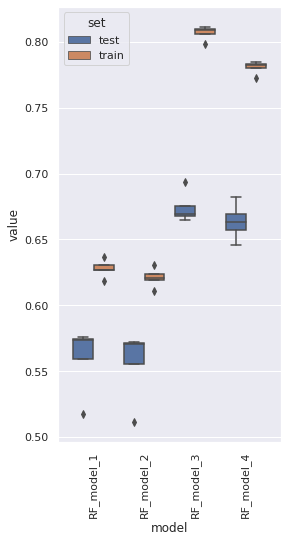

In [ ]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(4,8)})
ax = sns.boxplot(x="model", y="value", hue="set", data=dfScoreResults[(dfScoreResults["metric"]=="R2")&(dfScoreResults["method"]=="Random Forest")])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.plot()
plt.savefig('result_RF_TrainVsTest.png', dpi=300, format='png', bbox_inches='tight')

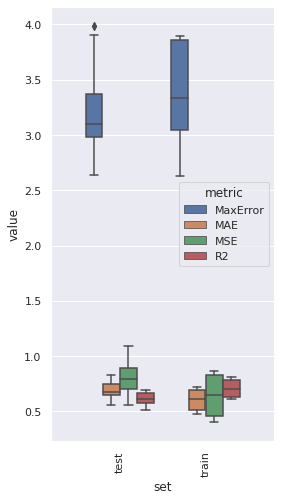

In [ ]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(4,8)})
ax = sns.boxplot(x="set", y="value", hue="metric", data=dfScoreResults[dfScoreResults["method"]=="Random Forest"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.plot()
plt.savefig('result_RF_TrainVsTest.png', dpi=300, format='png', bbox_inches='tight')

### **LightGBM Internal validation**

In [ ]:
removeModels = dfScoreResults.loc[dfScoreResults["value"]<0]["model"].unique()
removeModels = list(removeModels)
removeModels.append("RF_model_4")
removeModels.append("RF_model_1")
removeModels.append("RF_model_2")
dfScoreResults= dfScoreResults.loc[~(dfScoreResults["model"].isin(removeModels))]

In [ ]:
print("\n Mean of R2:\n",dfScoreResults[(dfScoreResults["metric"]=="R2")&(dfScoreResults["set"]=="test")].groupby(["method"]).mean())
print("\n Std of R2:\n",dfScoreResults[(dfScoreResults["metric"]=="R2")&(dfScoreResults["set"]=="test")].groupby(["method"]).std())


 Mean of R2:
                   value
method                 
LightGBM       0.522901
Random Forest  0.673989

 Std of R2:
                   value
method                 
LightGBM       0.170968
Random Forest  0.013177


In [ ]:
print("\n Mean of MSE:\n",dfScoreResults[(dfScoreResults["metric"]=="MSE")&(dfScoreResults["set"]=="test")].groupby(["method"]).mean())
print("\n Std of MSE:\n",dfScoreResults[(dfScoreResults["metric"]=="MSE")&(dfScoreResults["set"]=="test")].groupby(["method"]).std())


 Mean of MSE:
                   value
method                 
LightGBM       1.044775
Random Forest  0.688514

 Std of MSE:
                   value
method                 
LightGBM       0.388455
Random Forest  0.077209


In [ ]:
print("\n Mean of MAE:\n",dfScoreResults[(dfScoreResults["metric"]=="MAE")&(dfScoreResults["set"]=="test")].groupby(["method"]).mean())
print("\n Std of MAE:\n",dfScoreResults[(dfScoreResults["metric"]=="MAE")&(dfScoreResults["set"]=="test")].groupby(["method"]).std())


 Mean of MAE:
                   value
method                 
LightGBM       0.798672
Random Forest  0.627812

 Std of MAE:
                   value
method                 
LightGBM       0.184017
Random Forest  0.048581


In [ ]:
dfScoreResultsByParams = dfScoreResults[(dfScoreResults["metric"]=="R2")&(dfScoreResults["set"]=="test")].groupby(["model"]).mean()
dfScoreResultsByParams = dfScoreResultsByParams.sort_values('value', ascending = False)
dfScoreResultsByParamsSubset = dfScoreResultsByParams[dfScoreResultsByParams.value > 0.53]
print("\nMean R2 of best models:\n",dfScoreResultsByParamsSubset)
bestModels = list(dfScoreResultsByParamsSubset.index)
print("\n\nmodels showing best R2 in internal validation: \n",bestModels)
dfScoreResultsByParamsSTD = dfScoreResults[(dfScoreResults["metric"]=="R2")&(dfScoreResults["set"]=="test")].groupby(["model"]).std()
dfScoreResultsByParamsSTDSubset = dfScoreResultsByParamsSTD[dfScoreResultsByParams.value > 0.53]
print("\n Std R2 of best models:\n",dfScoreResultsByParamsSTDSubset)


Mean R2 of best models:
                   value
model                  
LGBM_model_24  0.713453
LGBM_model_17  0.711196
LGBM_model_12  0.711062
LGBM_model_23  0.710976
LGBM_model_18  0.710197
LGBM_model_6   0.709128
LGBM_model_5   0.706940
LGBM_model_11  0.706514
LGBM_model_22  0.688885
LGBM_model_16  0.688349
LGBM_model_21  0.680120
LGBM_model_15  0.680120
RF_model_3     0.673989
LGBM_model_42  0.654585
LGBM_model_48  0.654480
LGBM_model_47  0.647097
LGBM_model_41  0.647097
LGBM_model_10  0.620902
LGBM_model_4   0.620902
LGBM_model_9   0.611543
LGBM_model_3   0.611543


models showing best R2 in internal validation: 
 ['LGBM_model_24', 'LGBM_model_17', 'LGBM_model_12', 'LGBM_model_23', 'LGBM_model_18', 'LGBM_model_6', 'LGBM_model_5', 'LGBM_model_11', 'LGBM_model_22', 'LGBM_model_16', 'LGBM_model_21', 'LGBM_model_15', 'RF_model_3', 'LGBM_model_42', 'LGBM_model_48', 'LGBM_model_47', 'LGBM_model_41', 'LGBM_model_10', 'LGBM_model_4', 'LGBM_model_9', 'LGBM_model_3']

 Std R2 of best mode

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


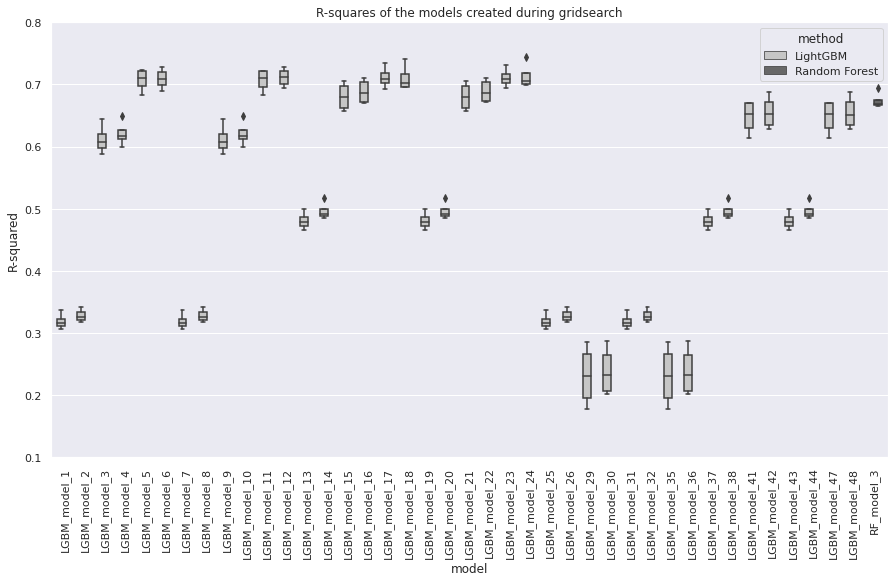

In [ ]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="model", y="value",hue="method", data=dfScoreResults[(dfScoreResults["metric"]=="R2")&(dfScoreResults["set"]=="test")],palette="Greys")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(title='R-squares of the models created during gridsearch')
ax.set_ylabel("R-squared")
ax.set_ylim(0.1,.8)
plt.plot()
plt.savefig('result_R2_RF-Vs-LGBM.png', dpi=300, format='png', bbox_inches='tight')

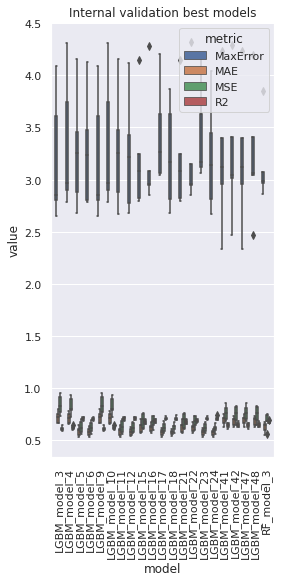

In [ ]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(4,8)})
ax = sns.boxplot(x="model", y="value", hue="metric", data=dfScoreResults[(dfScoreResults["model"].isin(bestModels))&(dfScoreResults["set"]=="test")])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(title='Internal validation best models')
plt.plot()
plt.savefig('result_R2_RF-Vs-BestLGBM.png', dpi=300, format='png', bbox_inches='tight')

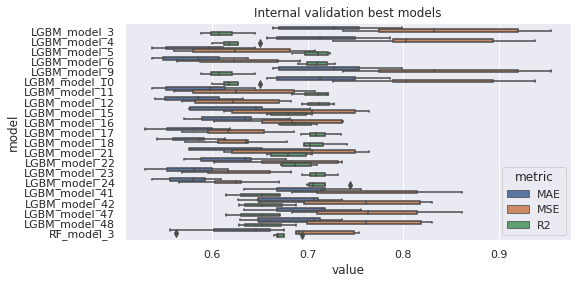

In [ ]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(8,4)})
ax = sns.boxplot(x="value", y="model", hue="metric", data=dfScoreResults[(dfScoreResults["model"].isin(bestModels))&(dfScoreResults["set"]=="test")&(dfScoreResults["metric"]!="MaxError")])
ax.set(title='Internal validation best models')
plt.plot()
plt.savefig('result_R2_RF-Vs-BestLGBM2.png', dpi=300, format='png', bbox_inches='tight')

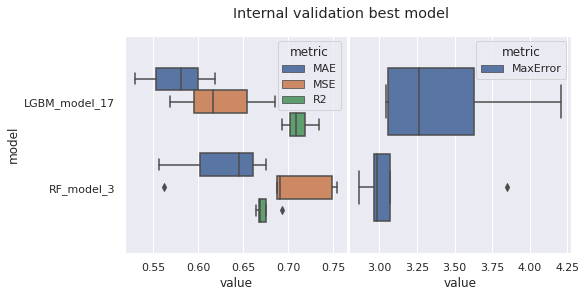

In [ ]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(8,4)})
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharey=True)
ax = sns.boxplot(x="value", y="model", hue="metric", data=dfScoreResults[(dfScoreResults["model"].isin(["RF_model_3","LGBM_model_17"]))&(dfScoreResults["set"]=="test")&(dfScoreResults["metric"]!="MaxError")],ax=ax1)
ax = sns.boxplot(x="value", y="model", hue="metric", data=dfScoreResults[(dfScoreResults["model"].isin(["RF_model_3","LGBM_model_17"]))&(dfScoreResults["set"]=="test")&(dfScoreResults["metric"]=="MaxError")],ax=ax2)
f.suptitle('Internal validation best model')
ax2.set_ylabel("")
plt.subplots_adjust(wspace=.01, hspace=0)
plt.plot()
plt.savefig('result_R2_RF-Vs-BestLGBM3.png', dpi=300, format='png', bbox_inches='tight')

### **External validation**

In [ ]:
ModelResultsTable.to_csv('CCR5_Results.csv', index=False)

In [ ]:
ModelResultsTable

,Model,R2,MAE,MSE,MaxError,Params,ExecutionTime
0,LGBM_model_6,0.757318,0.534511,0.546010,2.800542,"{'boosting_type': 'gbdt', 'learning_rate': 0.1...",0.656021
1,LGBM_model_12,0.760474,0.529821,0.538909,2.688978,"{'boosting_type': 'gbdt', 'learning_rate': 0.1...",0.645512
2,LGBM_model_23,0.766503,0.529461,0.525344,2.508188,"{'boosting_type': 'gbdt', 'learning_rate': 0.1...",0.525471
3,LGBM_model_17,0.766503,0.529461,0.525344,2.508188,"{'boosting_type': 'gbdt', 'learning_rate': 0.1...",0.521774
4,RF_model_3,0.695394,0.601103,0.685332,3.499169,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",29.082080


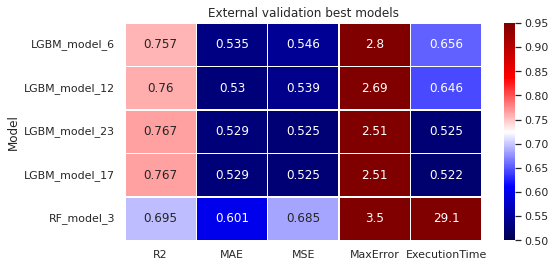

In [ ]:
resultsTable = ModelResultsTable.drop(["Params"],axis=1)
resultsTable = resultsTable.set_index('Model')
sns.set(rc = {'figure.figsize':(8,4)})
ax = sns.heatmap(resultsTable, annot=True, fmt='.3g',linewidths=.5, cmap="seismic",vmin=.5,vmax=.95)
ax.set(title='External validation best models')
plt.savefig('result_RF-Vs-BestLGBM2.png', dpi=300, format='png', bbox_inches='tight')

## **Conclusions**
The LightGBM is slowly finding its way into practical use and may replace the RF as the most popular classifier. Our study shows that the emerging LightGBM also has potential in QSAR model and can deliver equally good results as the popular Random Forest. Both methods delivered comparable scores, in the internal and external validation, predicting the CCR5 inhibitory effekt of small molecules.



### **Zip files**

In [ ]:
! zip -r ccr5_results.zip . -i *.csv *.png

updating: bioactivity_final.csv (deflated 82%)
updating: descriptors_output.csv (deflated 96%)
updating: QSAR_CCR5_bioactivity_pubchem.csv (deflated 96%)
updating: QSAR_CCR5_bioactivity.csv (deflated 92%)
updating: CCR5_Results.csv (deflated 63%)
updating: bioactivity_data_preprocessed.csv (deflated 86%)
  adding: result_RF_TrainVsTest.png (deflated 22%)
  adding: result_R2_RF-Vs-LGBM.png (deflated 31%)
  adding: result_R2_RF-Vs-BestLGBM2.png (deflated 13%)
  adding: result_RF-Vs-BestLGBM2.png (deflated 9%)
  adding: result_R2_RF-Vs-BestLGBM3.png (deflated 19%)
  adding: result_R2_RF-Vs-BestLGBM.png (deflated 16%)
